In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm

from statsmodels.formula.api import ols, logit
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

In [78]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [79]:
data.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

In [80]:
liste = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size','Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
data.columns = liste

In [81]:
data

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [83]:
#data['Bare Nuclei'].astype(str).astype(int)
#data[data['Bare Nuclei'] not in].count()
#data['Bare Nuclei'] = data['Bare Nuclei'].astype('int')

In [84]:
data.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


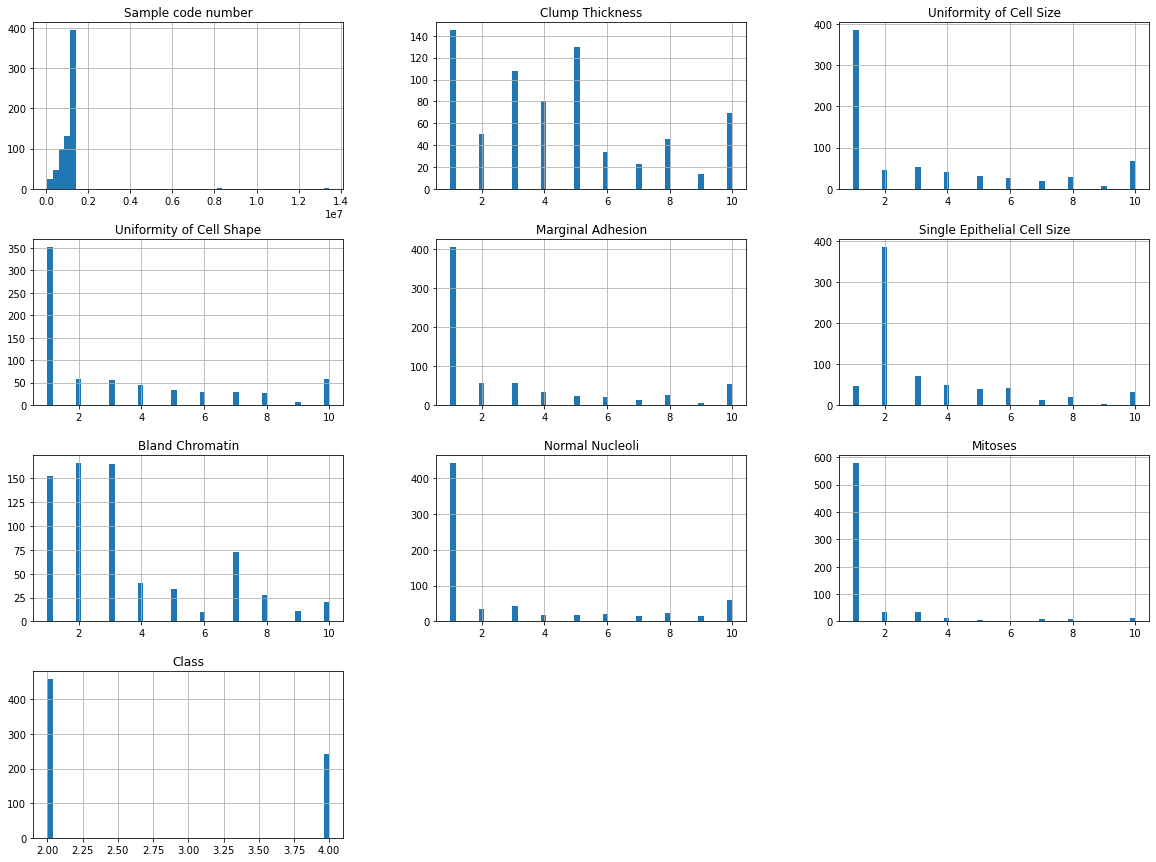

In [85]:
import matplotlib.pyplot as plt 
data.hist(bins=50, figsize=(20,15)) 
plt.show()

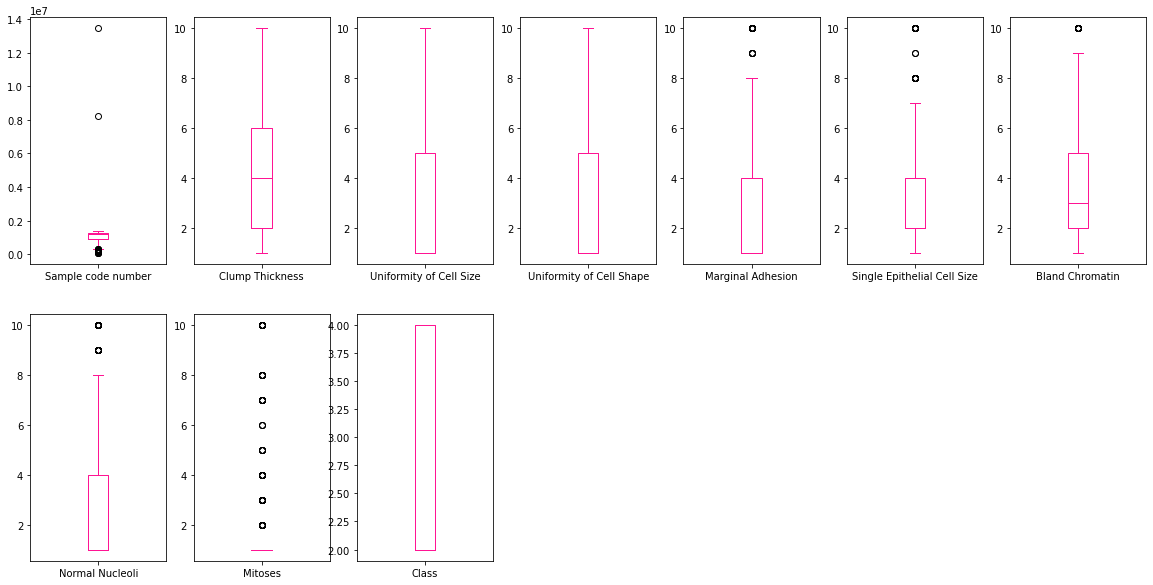

In [86]:
data.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(20, 10), 
color='deeppink');

Text(0.5, 1.0, 'Epithelial Cell Size vs Bare Nuclei')

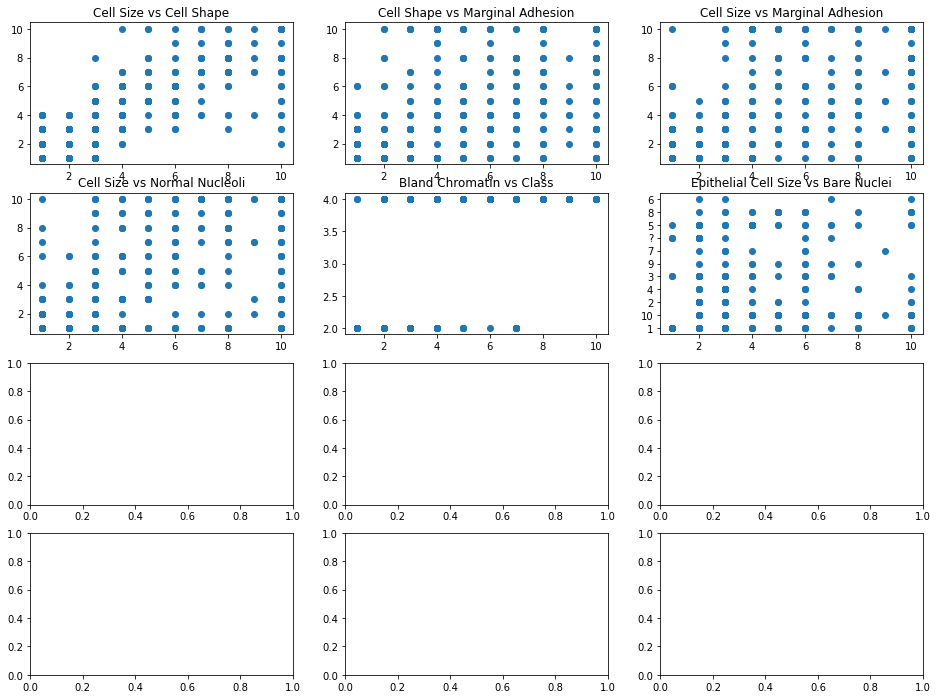

In [87]:
fig,axes = plt.subplots(4,3, figsize=(16,12))
#norm=plt.Normalize(-22,22)
axes[0][0].scatter(data['Uniformity of Cell Size'],data['Uniformity of Cell Shape'])
axes[0][0].set_title("Cell Size vs Cell Shape")
axes[0][1].scatter(data['Uniformity of Cell Shape'],data['Marginal Adhesion'])
axes[0][1].set_title("Cell Shape vs Marginal Adhesion")
axes[0][2].scatter(data['Uniformity of Cell Size'],data['Marginal Adhesion'])
axes[0][2].set_title("Cell Size vs Marginal Adhesion")
axes[1][0].scatter(data['Uniformity of Cell Size'],data['Normal Nucleoli'])
axes[1][0].set_title("Cell Size vs Normal Nucleoli")
axes[1][1].scatter(data['Bland Chromatin'],data['Class'])
axes[1][1].set_title("Bland Chromatin vs Class")
axes[1][2].scatter(data['Single Epithelial Cell Size'],data['Bare Nuclei'])
axes[1][2].set_title("Epithelial Cell Size vs Bare Nuclei")

In [88]:
data.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

<ipython-input-89-939b9bc89c10>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()
<ipython-input-89-939b9bc89c10>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr,dtype=np.bool), cmap = sns.diverging_palette(220,10, as_cmap=True), square = True, ax=ax)


<AxesSubplot:>

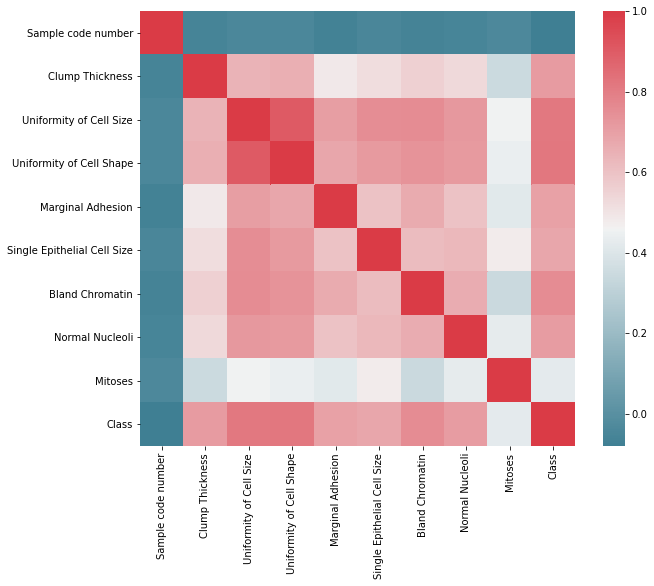

In [89]:
import seaborn as sns
import numpy as np

f,ax= plt.subplots(figsize=(10,8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr,dtype=np.bool), cmap = sns.diverging_palette(220,10, as_cmap=True), square = True, ax=ax)

In [94]:
#data = data.select_dtypes(include=np.number)

In [95]:
data.corr().abs().sort_values("Class")["Class"]

Sample code number             0.080226
Mitoses                        0.423170
Single Epithelial Cell Size    0.682785
Marginal Adhesion              0.696800
Normal Nucleoli                0.712244
Clump Thickness                0.716001
Bland Chromatin                0.756616
Uniformity of Cell Size        0.817904
Uniformity of Cell Shape       0.818934
Class                          1.000000
Name: Class, dtype: float64

In [101]:
for i,j in data.iterrows():
    if data.loc[i,'Class'] == 2 or data.loc[i,'Class'] == 0:
        data.loc[i,'Class'] = 0
    else: #data.loc[i,'Class'] == 4:
        data.loc[i,'Class'] = 1

In [102]:
data

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,3,1,1,0
1,1002945,5,4,4,5,7,3,2,1,0
2,1015425,3,1,1,1,2,3,1,1,0
3,1016277,6,8,8,1,3,3,7,1,0
4,1017023,4,1,1,3,2,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,1,1,1,0
695,841769,2,1,1,1,2,1,1,1,0
696,888820,5,10,10,3,7,8,10,2,1
697,897471,4,8,6,4,3,10,6,1,1


In [103]:
X = data.drop(['Class'], axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524 entries, 570 to 684
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           524 non-null    int64
 1   Clump Thickness              524 non-null    int64
 2   Uniformity of Cell Size      524 non-null    int64
 3   Uniformity of Cell Shape     524 non-null    int64
 4   Marginal Adhesion            524 non-null    int64
 5   Single Epithelial Cell Size  524 non-null    int64
 6   Bland Chromatin              524 non-null    int64
 7   Normal Nucleoli              524 non-null    int64
 8   Mitoses                      524 non-null    int64
dtypes: int64(9)
memory usage: 40.9 KB


In [104]:
sc_x = StandardScaler()

X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

In [105]:
classifier_NB = GaussianNB()
classifier_NB.fit(X_train, y_train)

GaussianNB()

In [106]:
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report



clf_svm = svm.SVC()
clf_svm.fit(X_train, y_train)

y_pred_train_SVM = clf_svm.predict(X_train)
roc_train_SVM=roc_auc_score(y_train,y_pred_train_SVM)
accuracy_train_SVM=accuracy_score(y_train, y_pred_train_SVM)
precision_train_SVM=precision_score(y_train, y_pred_train_SVM)
recall_train_SVM=recall_score(y_train, y_pred_train_SVM)
f1_train_SVM=f1_score(y_train, y_pred_train_SVM)
print("Train ROC Score is",roc_train_SVM)
print("Accuracy score is ",accuracy_train_SVM)
print("Precision score is ",precision_train_SVM)
print("Recall score is ",recall_train_SVM)
print("f1 score is ",f1_train_SVM)

Train ROC Score is 0.9686140157173476
Accuracy score is  0.9675572519083969
Precision score is  0.9351351351351351
Recall score is  0.9719101123595506
f1 score is  0.953168044077135


In [107]:
y_pred_test_SVM = clf_svm.predict(X_test)
roc_test_SVM=roc_auc_score(y_test,y_pred_test_SVM)
accuracy_test_SVM=accuracy_score(y_test, y_pred_test_SVM)
precision_test_SVM=precision_score(y_test, y_pred_test_SVM)
recall_test_SVM=recall_score(y_test, y_pred_test_SVM)
f1_test_SVM=f1_score(y_test, y_pred_test_SVM)

print("Test ROC Score is",roc_test_SVM)
print("Accuracy score is ",accuracy_test_SVM)
print("Precision score is ",precision_test_SVM)
print("Recall score is ",recall_test_SVM)
print("f1 score is ",f1_test_SVM)

Test ROC Score is 0.9538690476190477
Accuracy score is  0.9542857142857143
Precision score is  0.9230769230769231
Recall score is  0.9523809523809523
f1 score is  0.9375


In [108]:
cm_test_SVM = confusion_matrix(y_test, y_pred_test_SVM)
cm_test_SVM

array([[107,   5],
       [  3,  60]], dtype=int64)

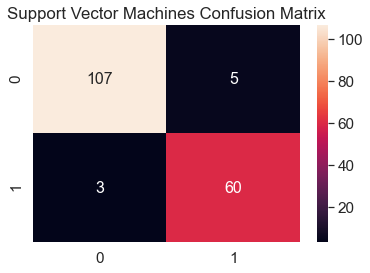

In [109]:
sns.set(font_scale=1.4)
sns.heatmap(cm_test_SVM, annot=True, annot_kws={"size": 16}, fmt='g')
plt.title('Support Vector Machines Confusion Matrix')
plt.show()

In [110]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

classifier_NB = GaussianNB()
classifier_NB.fit(X_train, y_train)

y_pred_train_NB = classifier_NB.predict(X_train)
roc_train_NB=roc_auc_score(y_train,y_pred_train_NB)
accuracy_train_NB=accuracy_score(y_train, y_pred_train_NB)
precision_train_NB=precision_score(y_train, y_pred_train_NB)
recall_train_NB=recall_score(y_train, y_pred_train_NB)
f1_train_NB=f1_score(y_train, y_pred_train_NB)

print("Train ROC Score is",roc_train_NB)
print("Accuracy score is ",accuracy_train_NB)
print("Precision score is ",precision_train_NB)
print("Recall score is ",recall_train_NB)
print("f1 score is ",f1_train_NB)

Train ROC Score is 0.9613885821913359
Accuracy score is  0.9580152671755725
Precision score is  0.9105263157894737
Recall score is  0.9719101123595506
f1 score is  0.9402173913043478


In [111]:
y_pred_test_NB = classifier_NB.predict(X_test)
roc_test_NB=roc_auc_score(y_test,y_pred_test_NB)
accuracy_test_NB=accuracy_score(y_test, y_pred_test_NB)
precision_test_NB=precision_score(y_test, y_pred_test_NB)
recall_test_NB=recall_score(y_test, y_pred_test_NB)
f1_test_NB=f1_score(y_test, y_pred_test_NB)

print("Test ROC Score is",roc_test_NB)
print("Accuracy score is ",accuracy_test_NB)
print("Precision score is ",precision_test_NB)
print("Recall score is ",recall_test_NB)
print("f1 score is ",f1_test_NB)

Test ROC Score is 0.9573412698412699
Accuracy score is  0.9542857142857143
Precision score is  0.9104477611940298
Recall score is  0.9682539682539683
f1 score is  0.9384615384615386


In [112]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [113]:
cm_test_NB = confusion_matrix(y_test, y_pred_test_NB)
cm_test_NB

array([[106,   6],
       [  2,  61]], dtype=int64)

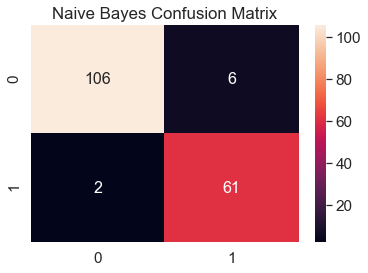

In [114]:
sns.set(font_scale=1.4)
sns.heatmap(cm_test_NB, annot=True, annot_kws={"size": 16}, fmt='g')
plt.title('Naive Bayes Confusion Matrix')
plt.show()